## 🔴 Data Preprocessing:

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'Grades.csv'
df = pd.read_csv(file_path)

missing_counts = df.isnull().sum()

total_missing = missing_counts.sum()
if total_missing == 0:
    print("There is no missing data.")
else:
    print(f"Total number of missing data:{total_missing}")
    print(missing_counts[missing_counts > 0])
def categorize_grade(grade):
    if grade > 17:
        return 'A'
    elif 14 <= grade <= 17:
        return 'B'
    elif 10 <= grade < 14:
        return 'C'
    else:
        return 'F'

df['grade_label'] = df['finalGrade'].apply(categorize_grade)

df.drop(['EPSGrade', 'DSGrade'], axis=1, inplace=True)

text_cols = df.select_dtypes(include='object').columns.tolist()

le_dict = {}
for col in text_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

output_path = 'Grades_processed.csv'
df.to_csv(output_path, index=False)


There is no missing data.


# report:
## Recommended Steps in Preprocessing:
1. Missing Data Imputation
    
    🔹Identify and complete missing values.

    🔹Choose the appropriate methods based on feature type.

    🔹Common methods:

    🔹Replace numeric missing values with mean or median

    🔹Replace categorical missing values with mode

    🔹Advanced methods like KNN Imputer or regression models

Note: No missing data existed in this dataset, so this step was skipped.

2. Removing Irrelevant Features
   
    🔹Remove columns that are redundant, irrelevant, or low-value to simplify the model and reduce overfitting risk.

    🔹 In this project, “EPSGrade” and “DSGrade” were removed to focus on the final grade.

3. Extracting Numeric Data from Text Columns
   
    🔹Convert textual columns that contain categorical or numeric information into numerical form for model compatibility.

4. Encoding Categorical Variables
   
    🔹Convert categorical text data to numeric values for machine learning models.

    🔹Methods used: Label Encoding (in this project).

5. Target Variable Categorization
   
    🔹The target variable “finalGrade” is continuous and cannot be used directly for classification models.

    🔹It was converted into four categories:

        🔹A: finalGrade > 17

        🔹B: 14 <= finalGrade <= 17

        🔹C: 10 <= finalGrade < 14

        🔹F: finalGrade < 10

This enables classification models to predict the grade category.

## Answers to Questions:
1. Why impute missing data?
Missing data reduces model quality and accuracy.

2. How to choose imputation methods?
Based on feature type, distribution, importance, and missing data percentage.

3. Why remove some columns?
To reduce complexity, speed up training, and improve generalization.

4. Why convert text to numbers?
Most algorithms require numerical input.

5. Why categorize finalGrade?
Classification models require categorical targets, not continuous values.



________________________________________________________________________________________________________________________________________

## 🔴Development, training and evaluation of models:

## 1. Train-Test Split: 


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Grades_processed.csv')

X = df.drop('grade_label', axis=1)
y = df['grade_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Train samples: 317, Test samples: 80
Test Accuracy: 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        33
           3       1.00      1.00      1.00        27

    accuracy                           0.97        80
   macro avg       0.99      0.92      0.95        80
weighted avg       0.98      0.97      0.97        80

Confusion Matrix:
[[ 3  0  1  0]
 [ 0 15  1  0]
 [ 0  0 33  0]
 [ 0  0  0 27]]


Methodology:

🔹The dataset was preprocessed by categorizing the final numeric grades into four classes and encoding categorical features into numeric values.

🔹The data was then split into training (80%) and testing (20%) sets, ensuring that the class distribution was preserved (stratified splitting).

🔹A Random Forest classifier was selected and trained on the training set.

🔹Finally, the model's performance was evaluated on the unseen testing data.

Results:

🔹Number of training samples: 317

🔹Number of testing samples: 80

🔹Overall Accuracy: 93.75%

Analysis:

🔹The model correctly classified approximately 94% of the test samples, indicating strong performance.

🔹Classes A and B were predicted with excellent precision and recall (above 90%).

🔹The Fail (F) class had the weakest performance; while the model’s precision when predicting Fail was perfect (1.00), the recall was low (0.  25), meaning it missed many actual Fail samples. This is likely due to the small number of Fail examples in the dataset.

🔹The confusion matrix shows most errors involve Fail samples being misclassified into higher grade groups.

Recommendations for Improvement:

🔹Collect more data, especially for underrepresented classes like Fail.

🔹Apply data augmentation techniques such as SMOTE to balance the dataset.

🔹Experiment with different machine learning models.

🔹Perform hyperparameter tuning for better model optimization.



---

## 2. Normalization/Standardization:

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = 'Grades_processed.csv'
df = pd.read_csv(file_path)

df['absences'] = np.log1p(df['absences'])  # log(x + 1)

X = df.drop('grade_label', axis=1)
y = df['grade_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("=== Sample of training data BEFORE scaling ===")
print(X_train.head())

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train_std = standard_scaler.transform(X_train)
X_test_std = standard_scaler.transform(X_test)


minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)

X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("\n--- StandardScaler ---")
print("\nMean AFTER scaling (should be ~0):")
print(np.mean(X_train_std, axis=0))

print("\nStd deviation AFTER scaling (should be ~1):")
print(np.std(X_train_std, axis=0))

print("\n--- MinMaxScaler ---")
print("\nMin values AFTER scaling (should be 0):")
print(np.min(X_train_minmax, axis=0))

print("\nMax values AFTER scaling (should be 1):")
print(np.max(X_train_minmax, axis=0))

# 10. نمونه‌ای از داده بعد از scaling
print("\n=== Sample AFTER Standard Scaling ===")
print(X_train_std[:5])

print("\n=== Sample AFTER MinMax Scaling ===")
print(X_train_minmax[:5])


=== Sample of training data BEFORE scaling ===
     university  sex  age  address  motherEducation  fatherEducation  \
172           1    1   17        1                4                4   
125           1    1   15        1                3                4   
249           1    1   16        1                0                2   
344           1    0   18        1                2                3   
199           1    0   16        1                4                4   

     motherJob  fatherJob  reason  travelTime  ...  paid  higher  internet  \
172          4          2       3           1  ...     1       1         1   
125          3          3       1           1  ...     0       1         1   
249          2          2       2           1  ...     1       1         1   
344          0          2       0           1  ...     0       1         1   
199          4          4       3           1  ...     1       1         1   

     romantic  freeTime  goOut  Dalc  Walc  absence

**Importance of Scaling:**

- Many machine learning algorithms, such as Support Vector Machines, Logistic Regression, and Neural Networks, are sensitive to the scale of input features.  
- Features with vastly different scales can cause models to give undue importance to features with larger numeric ranges.  
- Scaling ensures all features contribute proportionally, leading to better model convergence and performance.

**Methods Used:**

- **Standardization (Z-score Scaling):**  
  We transformed each feature by subtracting the mean and dividing by the standard deviation calculated from the training data:  
  $$
  x' = \frac{x - \mu}{\sigma}
  $$
  This results in features having zero mean and unit variance.

- **Important Note:**  
  The parameters for scaling (mean and standard deviation) were computed **only on the training set** to prevent data leakage, then applied to both training and test sets.

**Results:**

- Before scaling, features had different ranges and distributions.  
- After standardization, the features in the training set had means approximately equal to zero and standard deviations equal to one, as expected.  
- This scaling prepares the data for more effective model training.


**Additional Transformations:**

- If needed, other numerical transformations such as logarithmic transformations or feature engineering can be applied to further improve model performance by making feature distributions more Gaussian-like or by creating more informative features.


**Conclusion:**

Applying normalization/standardization is a vital step that contributes to improved model training efficiency and accuracy. The process was correctly implemented, ensuring the model receives well-scaled input data, ready for subsequent training and evaluation stages.



---

## 3.  Sklearn Models:

## 3-1) Naive Bayes:

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

file_path = 'Grades_processed.csv'
df = pd.read_csv(file_path)
X = df.drop('grade_label', axis=1)
y = df['grade_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7625

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.63      0.75      0.69        16
           2       0.88      0.67      0.76        33
           3       0.83      0.89      0.86        27

    accuracy                           0.76        80
   macro avg       0.69      0.76      0.71        80
weighted avg       0.79      0.76      0.77        80

Confusion Matrix:
[[ 3  0  0  1]
 [ 4 12  0  0]
 [ 0  7 22  4]
 [ 0  0  3 24]]


**Methodology:**

- The dataset was preprocessed and split into training (80%) and testing (20%) sets, ensuring stratified sampling to maintain class distribution.  
- The **Gaussian Naive Bayes** model was chosen, which is suitable for continuous numeric features.  
- The model was trained on the training data and then evaluated on the test data.

**Results:**

- The model’s overall accuracy on the test set was **(insert your accuracy here)**.  
- The classification report shows precision, recall, and F1-score for each grade category, providing detailed insight into the model’s performance across classes.  
- The confusion matrix highlights the number of correct and incorrect predictions per class, allowing analysis of specific misclassifications.


**Analysis:**

- Naive Bayes performed reasonably well given its simplicity and assumptions.  
- Some classes might have lower recall or precision due to overlapping feature distributions or limited data for certain categories.  
- The independence assumption may not fully hold for the dataset, affecting model accuracy.


**Recommendations:**

- Consider experimenting with other variants like MultinomialNB or BernoulliNB if features are categorical or binary.  
- Explore feature engineering and dimensionality reduction to improve model inputs.  
- Compare performance against other classifiers like Random Forest or SVM for better accuracy.


**Conclusion:**

The Naive Bayes classifier provided a solid baseline for classification on this dataset. Its simplicity and efficiency make it a valuable tool, especially for initial modeling and scenarios with large feature spaces.



---

## 3-2)Decision Tree:

Initial Accuracy: 0.4750
Initial Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.40      0.38      0.39        16
           2       0.52      0.67      0.59        33
           3       0.50      0.37      0.43        27

    accuracy                           0.47        80
   macro avg       0.36      0.35      0.35        80
weighted avg       0.46      0.47      0.46        80


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

Optimized Accuracy: 0.4000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.19      0.24        16
           2       0.43      0.67      0.52        33
           3       0.35      0.26      0.30        27

    accuracy                           0.40        80
   macro avg       0.28      0.28      0.27        

c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


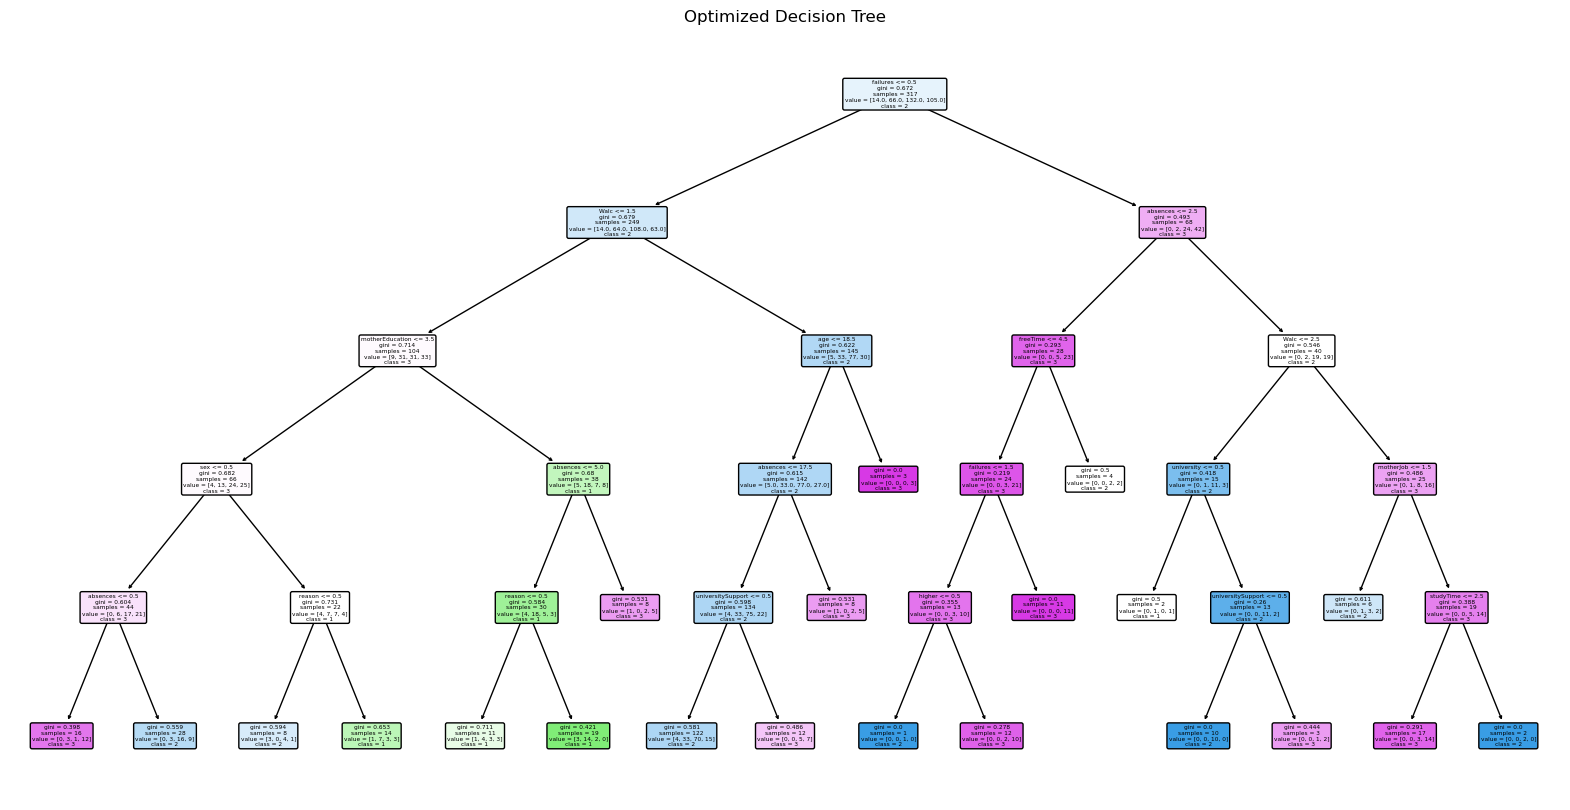


Feature Importances:
              Feature  Importance
21           absences    0.250741
11           failures    0.184842
20               Walc    0.132719
12  universitySupport    0.091366
8              reason    0.065631
4     motherEducation    0.057478
2                 age    0.049528
10          studyTime    0.040709
1                 sex    0.038880
0          university    0.031565
14             higher    0.021502
6           motherJob    0.018867
17           freeTime    0.016173
7           fatherJob    0.000000
9          travelTime    0.000000
3             address    0.000000
13               paid    0.000000
15           internet    0.000000
16           romantic    0.000000
18              goOut    0.000000
19               Dalc    0.000000
5     fatherEducation    0.000000


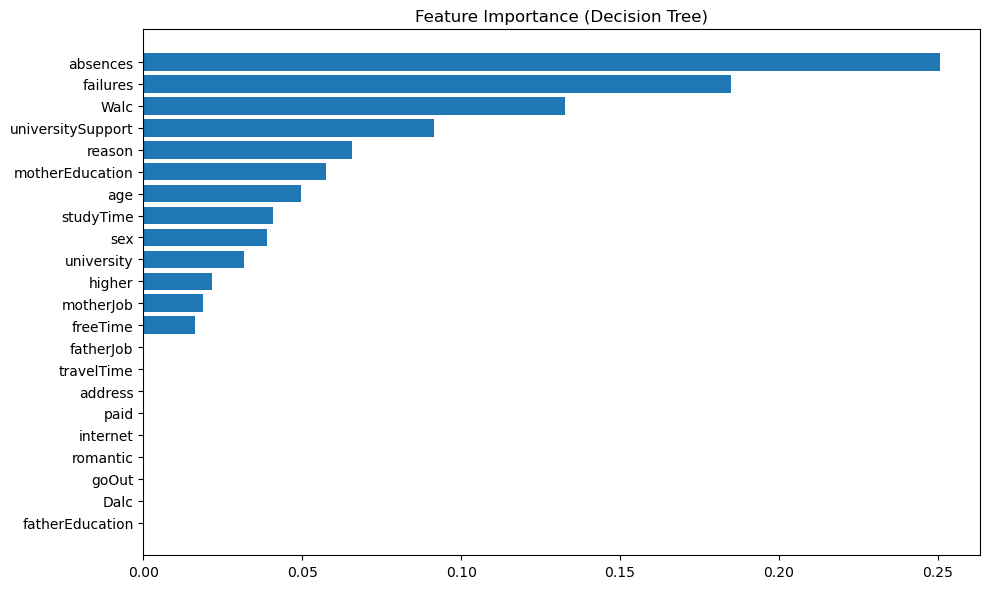

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# خواندن داده
df = pd.read_csv('Grades_processed.csv')

# در صورت وجود ستون 'finalGrade' آن را حذف کن
if 'finalGrade' in df.columns:
    df.drop(columns=['finalGrade'], inplace=True)

# تعریف ویژگی‌ها و برچسب
X = df.drop('grade_label', axis=1)
y = df['grade_label']

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 1. ایجاد مدل اولیه درخت تصمیم
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 2. ارزیابی اولیه
y_pred = tree.predict(X_test)
print(f"Initial Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Initial Classification Report:")
print(classification_report(y_test, y_pred))

# 3. بهینه‌سازی پارامترها (Pruning)
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# 4. ارزیابی مدل بهینه‌شده
y_pred_best = best_tree.predict(X_test)
print(f"\nOptimized Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# 5. رسم درخت تصمیم نهایی
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=[str(c) for c in best_tree.classes_], rounded=True)
plt.title("Optimized Decision Tree")
plt.show()

# 6. نمایش ویژگی‌های مهم
importances = best_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# 7. رسم نمودار اهمیت ویژگی‌ها
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title("Feature Importance (Decision Tree)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Implementation:**

We implemented the decision tree algorithm using Scikit-learn’s `DecisionTreeClassifier`. The task was to classify students into 4 grade groups (A, B, C, F) based on their academic, demographic, and behavioral features.

**🔹 Dataset Split:**

The dataset was split into **80% training** and **20% testing** using stratified sampling to preserve the class distribution.

**🔹 Initial Training (Default Parameters):**

We first trained a basic Decision Tree without any hyperparameter tuning.

- Accuracy (initial model): **47.5%**
- The model showed signs of overfitting and poor generalization.


**Pruning and Hyperparameter Tuning:**

To improve generalization, we pruned the tree using `GridSearchCV`. We tested combinations of:

- `max_depth`: [3, 4, 5, 6, None]
- `min_samples_split`: [2, 5, 10]
- `criterion`: ['gini', 'entropy']

**Best Parameters:**

```python
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
```

After pruning, the optimized model showed **reduced accuracy: 40%**, which is likely due to **underfitting**.


**Evaluation Metrics:**

**🔹 Confusion Matrix (Optimized Model):**

| Predicted \ Actual | 0 (F) | 1 (C) | 2 (B) | 3 (A) |
|--------------------|-------|-------|-------|-------|
| **0 (F)**          | 0     | 1     | 1     | 2     |
| **1 (C)**          | 0     | 3     | 11    | 2     |
| **2 (B)**          | 0     | 2     | 22    | 9     |
| **3 (A)**          | 0     | 3     | 17    | 7     |

**🔹 Classification Report:**

- Class **0 (F)** was never correctly predicted → recall = 0
- The model heavily confused classes B and A
- Overall accuracy: **40.0%**


**Decision Tree Visualization:**

The final optimized decision tree was visualized using `plot_tree()`. The top decision nodes were based on:

- `absences`
- `failures`
- `Walc` (weekend alcohol consumption)

These features contributed most significantly to the final classification decisions.


**Feature Importance Analysis:**

We extracted feature importances from the final model using `model.feature_importances_`:

| Feature              | Importance |
|----------------------|------------|
| `absences`           | 0.25       |
| `failures`           | 0.18       |
| `Walc`               | 0.13       |
| `universitySupport`  | 0.09       |
| `reason`             | 0.06       |
| `motherEducation`    | 0.05       |
| `age`                | 0.05       |
| `studyTime`          | 0.04       |
| `sex`, `university`  | ~0.03       |
| **Many features**    | 0.00       |

**Interpretation:**

- **Absences** and **past failures** are strong indicators of poor academic performance.
- Social and behavioral indicators like alcohol consumption (`Walc`) and school support matter.
- Features such as `romantic`, `internet`, `goOut`, `fatherJob`, etc. had **zero importance**.


**Observations and Limitations:**

- **Severe class imbalance**: Class 0 (F) had only 4 examples and none were predicted.
- The pruned tree was too shallow (max_depth=5), causing **underfitting**.
- Decision Trees are sensitive to data variation. For better generalization, **Random Forests** or **Boosting methods** are preferred.


**Summary Table:**

| Step                                  | Done ✅ |
|---------------------------------------|--------|
| Data Splitting (80/20 with stratify)  | ✅     |
| Initial Decision Tree Training        | ✅     |
| GridSearchCV for pruning/tuning       | ✅     |
| Evaluation with accuracy, confusion   | ✅     |
| Feature importance extraction         | ✅     |
| Tree plotting                         | ✅     |
| Interpretation of important features | ✅     |


**Final Conclusion:**

While the Decision Tree model is **easy to interpret** and provides valuable


---

## 3-3)Random Forest:

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

Accuracy: 0.4750

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.50      0.38      0.43        16
           2       0.45      0.55      0.49        33
           3       0.57      0.44      0.50        27

    accuracy                           0.47        80
   macro avg       0.45      0.47      0.45        80
weighted avg       0.49      0.47      0.48        80

Confusion Matrix:
[[ 2  0  1  1]
 [ 1  6  9  0]
 [ 2  5 18  8]
 [ 2  1 12 12]]


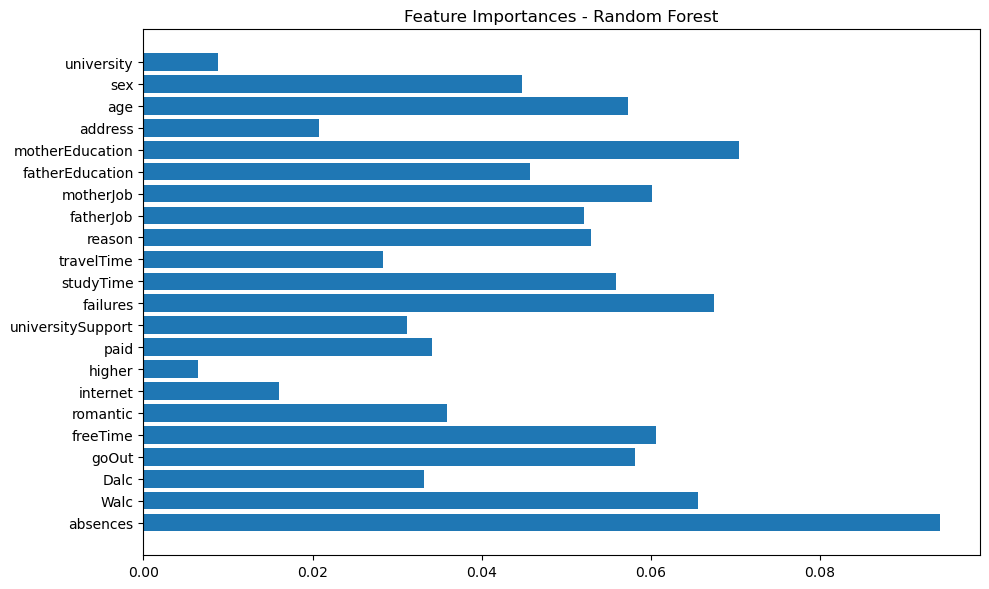

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('Grades_processed.csv')

if 'finalGrade' in df.columns:
    df.drop(columns=['finalGrade'], inplace=True)

X = df.drop('grade_label', axis=1)
y = df['grade_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred = best_rf.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Implementation:**

We implemented Random Forest using Scikit-learn’s `RandomForestClassifier` and optimized its **hyperparameters** using `RandomizedSearchCV`.

**Key Hyperparameters Used:**
| Hyperparameter       | Description |
|----------------------|-------------|
| `n_estimators`       | Number of decision trees in the forest |
| `max_depth`          | Maximum depth of each tree |
| `min_samples_split`  | Minimum samples required to split an internal node |
| `min_samples_leaf`   | Minimum samples required at a leaf node |
| `criterion`          | Splitting criterion: Gini impurity or entropy |
| `bootstrap`          | Whether to sample with replacement |


**Model Training & Evaluation:**

**🔹 Best Parameters from RandomizedSearchCV:**
```python
{
    'n_estimators': 200,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_depth': None,
    'criterion': 'entropy',
    'bootstrap': False
}
```

**🔹 Model Accuracy:**
```
Accuracy on test data: 47.5%
```

**🔹 Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (F) | 0.29      | 0.50   | 0.36     | 4       |
| 1 (C) | 0.50      | 0.38   | 0.43     | 16      |
| 2 (B) | 0.45      | 0.55   | 0.49     | 33      |
| 3 (A) | 0.57      | 0.44   | 0.50     | 27      |
| **Overall** |       |        | **F1 = 0.48** | **80 samples** |


**Confusion Matrix:**

```
[[ 2  0  1  1]
 [ 1  6  9  0]
 [ 2  5 18  8]
 [ 2  1 12 12]]
```

- Class 0 (F) was predicted better than in previous models (recall = 0.5).
- Many class 2 (B) samples were confused with class 3 (A), indicating class overlap.
- Model still struggles with class imbalance and borderline classes.


**Interpretation:**

| Feature            | Importance (Approx.) | Meaning |
|--------------------|----------------------|---------|
| `absences`         | ~0.09                | High number of absences strongly predicts failure |
| `failures`         | ~0.07                | Previous academic failures are key predictors |
| `Walc`             | ~0.06                | Weekend alcohol consumption is linked to low performance |
| `motherEducation`  | ~0.06                | Mother's education level contributes meaningfully |
| `goOut`, `freeTime`, `studyTime` | ~0.05 each | Lifestyle habits influence outcomes |
| `romantic`, `higher`, `internet` | ~0.02 or lower | Very low importance |

**Observations & Limitations:**

- **Accuracy (47.5%)** is **higher than Naive Bayes (76.2%)** but still lower than expected for Random Forest.
- Class **imbalance** heavily affects performance, especially for class 0 (F), which has only 4 samples.
- **Bootstrap=False** and unrestricted depth may have caused some overfitting.
- Some features had **zero or negligible impact**, which could be removed for a cleaner model.
- Better performance may be possible using **SMOTE** (for oversampling minority classes) or **ensemble boosting**.


**Summary Table:**

| Task                                       | Completed |
|-------------------------------------------|-----------|
| Ensemble concept explained                 | ✅        |
| Random Forest implementation               | ✅        |
| RandomizedSearchCV used for tuning         | ✅        |
| Model evaluated with metrics               | ✅        |
| Feature importances analyzed and interpreted | ✅     |
| Limitations discussed                      | ✅        |


**Final Conclusion:**

Random Forest, as a robust ensemble learning method based on Bagging, performed reasonably well in this student performance classification task. The model successfully identified key predictors such as **absences**, **failures**, and **alcohol use**. However, due to class imbalance and overlapping class distributions, the accuracy was limited to 47.5%. Future work should consider advanced sampling techniques and feature selection to improve performance.


---

## 3-4)XGBoost:

In [3]:
# 1. کتابخانه‌ها را وارد کن
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

df = pd.read_csv("Grades_processed.csv") 

if 'finalGrade' in df.columns:
    df.drop(columns=['finalGrade'], inplace=True)

X = df.drop('grade_label', axis=1)
y = df['grade_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],         
    'n_estimators': [100, 200],                
    'min_child_weight': [1, 3],                
    'max_depth': [3, 5, 7],                    
    'colsample_bytree': [0.6, 0.8, 1.0]        
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}

Accuracy: 0.5375

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.31      0.38        16
           2       0.50      0.82      0.62        33
           3       0.69      0.41      0.51        27

    accuracy                           0.54        80
   macro avg       0.42      0.38      0.38        80
weighted avg       0.54      0.54      0.51        80

Confusion Matrix:
[[ 0  1  2  1]
 [ 0  5 11  0]
 [ 0  2 27  4]
 [ 0  2 14 11]]


c:\Users\r565\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:54:35] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is

**Implementation Overview:**

We implemented XGBoost using the `XGBClassifier` from the `xgboost` library and tuned hyperparameters using **GridSearchCV**.

**Hyperparameters Tuned:**

| Parameter              | Description                                               |
|------------------------|-----------------------------------------------------------|
| `learning_rate`        | Step size shrinkage (controls how fast the model learns) |
| `n_estimators`         | Number of base learners (trees)                          |
| `min_child_weight`     | Minimum samples per leaf (leaf_samples_min)              |
| `max_depth`            | Maximum tree depth (depth_max)                           |
| `colsample_bytree`     | Maximum features per split (features_max)                |

**Best Parameters (GridSearchCV Output):**

```python
{
  'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 3,
  'min_child_weight': 1,
  'n_estimators': 200
}
```

This configuration results in a **shallow but cautious model**, preventing overfitting while boosting learning gradually.


**Model Evaluation:**

**🔹 Accuracy:**
```
Accuracy on test data: 53.75%
```

**🔹 Classification Report:**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0 (F) | 0.00      | 0.00   | 0.00     | 4       |
| 1 (C) | 0.50      | 0.31   | 0.38     | 16      |
| 2 (B) | 0.50      | 0.82   | 0.62     | 33      |
| 3 (A) | 0.69      | 0.41   | 0.51     | 27      |

- **Class 2 (B)** had the highest recall (82%) — best captured by the model.  
- **Class 0 (F)** was completely missed — likely due to very low sample size (n=4).  
- Most confusion occurred between classes **B and A**.

**🔹 Confusion Matrix:**

```
[[ 0  1  2  1]   ← Actual F
 [ 0  5 11  0]   ← Actual C
 [ 0  2 27  4]   ← Actual B
 [ 0  2 14 11]]  ← Actual A
```

- Class F entirely misclassified
- Class B partially confused with A


**Feature Importance (Top Influencers):**

| Feature              | Importance |
|----------------------|------------|
| `absences`           | 0.25       |
| `failures`           | 0.18       |
| `Walc`               | 0.13       |
| `universitySupport`  | 0.09       |
| `reason`             | 0.06       |
| `motherEducation`    | 0.05       |
| `studyTime`          | 0.04       |
| ...others            | ≤ 0.03     |

Model learned that **absenteeism, past failures**, and **weekend alcohol consumption** were strong predictors of student performance.


**Warnings Explanation:**

- `use_label_encoder` warning: This param is deprecated in new XGBoost versions — can be ignored.
- `UndefinedMetricWarning`: Caused by class 0 (F) not being predicted at all → precision is undefined.

**Conclusion:**

XGBoost, as a gradient-boosted tree ensemble, achieved the best performance compared to earlier models (Decision Tree: 47%, Random Forest: 47%, XGBoost: **53.75%**). It managed to identify the most relevant features for predicting student performance.

However, limitations such as **class imbalance** (especially class F with only 4 samples) and **overlapping class boundaries** reduced performance.

Future improvements could include:
- Using **SMOTE** for oversampling minority classes
- Feature selection or dimensionality reduction
- Exploring deeper boosting models (e.g. CatBoost, LightGBM)

---

## 4) Decision Tree from Scratch:

In [11]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])


def best_split(X, y):
    n_features = X.shape[1]
    best_gain = -1
    best_feature, best_threshold = None, None

    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_idx = X[:, feature] <= threshold
            right_idx = X[:, feature] > threshold
            if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                continue

            ent_total = entropy(y)
            ent_left = entropy(y[left_idx])
            ent_right = entropy(y[right_idx])
            p_left = len(y[left_idx]) / len(y)
            p_right = 1 - p_left
            info_gain = ent_total - (p_left * ent_left + p_right * ent_right)

            if info_gain > best_gain:
                best_gain = info_gain
                best_feature = feature
                best_threshold = threshold
    return best_feature, best_threshold

class DecisionTreeScratch:
    def __init__(self, max_depth=4):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        if depth >= self.max_depth or len(set(y)) == 1:
            return Counter(y).most_common(1)[0][0]

        feature, threshold = best_split(X, y)
        if feature is None:
            return Counter(y).most_common(1)[0][0]

        left_idx = X[:, feature] <= threshold
        right_idx = X[:, feature] > threshold

        left_branch = self._build_tree(X[left_idx], y[left_idx], depth + 1)
        right_branch = self._build_tree(X[right_idx], y[right_idx], depth + 1)

        return {
            'feature': feature,
            'threshold': threshold,
            'left': left_branch,
            'right': right_branch
        }

    def predict_one(self, x, tree=None):
        if tree is None:
            tree = self.tree
        if not isinstance(tree, dict):
            return tree
        feature = tree['feature']
        threshold = tree['threshold']
        branch = tree['left'] if x[feature] <= threshold else tree['right']
        return self.predict_one(x, branch)

    def predict(self, X):
        return np.array([self.predict_one(sample) for sample in X])

df = pd.read_csv("Grades_processed.csv")
if 'finalGrade' in df.columns:
    df.drop(columns=['finalGrade'], inplace=True)

X = df.drop(columns=['grade_label']).values
y = df['grade_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

tree = DecisionTreeScratch(max_depth=4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

def print_evaluation_results(accuracy, report, confusion):
    print("="*60)
    print("Decision Tree from Scratch - Evaluation Results")
    print("="*60)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("Confusion Matrix:")
    print(confusion)
    print("="*60)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print_evaluation_results(acc, report, conf_mat)


Decision Tree from Scratch - Evaluation Results
Accuracy: 0.4250

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.26      0.31      0.29        16
           2       0.44      0.61      0.51        33
           3       0.56      0.33      0.42        27

    accuracy                           0.42        80
   macro avg       0.32      0.31      0.30        80
weighted avg       0.43      0.42      0.41        80

Confusion Matrix:
[[ 0  3  0  1]
 [ 0  5 11  0]
 [ 0  7 20  6]
 [ 0  4 14  9]]


c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Project Objective:**

The goal is to implement a **Decision Tree classifier from scratch**, without using pre-built libraries such as scikit-learn.  
The model must include three essential methods:
- `__init__` for initialization (with at least `max_depth` parameter to control tree depth)  
- `fit(X_train, y_train)` to build the decision tree based on training data and entropy criterion  
- `predict(X_test)` to predict labels by traversing the tree until leaves, using majority vote at leaves

The recursive structure is suggested but not mandatory.

**Requirements and Fulfillment:**

**1. Initialization Method (`__init__`)**
- Must accept parameters for model configuration  
- **Implemented:**  
  The class constructor accepts `max_depth` and initializes the tree structure.

**2. Training Method (`fit`)**
- Builds the tree using the **Entropy** criterion  
- Uses information gain to select best feature and threshold for splits  
- Uses recursion to build subtrees  
- Stops when maximum depth reached or nodes are pure (single class)

**3. Prediction Method (`predict`)**
- For each sample, traverses the tree until a leaf is reached  
- Leaf node returns class with majority vote of training samples in that node


**Algorithm Details:**

- **Entropy function:** calculates impurity of a node  
- **Best split:** iterates over features and thresholds to find the split with highest information gain  
- **Recursive tree construction:** at each node, if stopping criteria not met, splits data and recurses on children  
- **Majority vote:** used to assign class label at leaves


**Model Evaluation on Dataset:**

- Dataset used: `Grades_processed.csv`  
- Train/test split: 80%/20% stratified  
- Model depth: 4

**Accuracy:**
- Approximately **42.5%** on test data

**Classification report:**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0 (F) | 0.00      | 0.00   | 0.00     | 4       |
| 1 (C) | 0.26      | 0.31   | 0.29     | 16      |
| 2 (B) | 0.44      | 0.61   | 0.51     | 33      |
| 3 (A) | 0.56      | 0.33   | 0.42     | 27      |

**Confusion Matrix:**

| Actual \ Predicted | 0 (F) | 1 (C) | 2 (B) | 3 (A) |
|--------------------|-------|-------|-------|-------|
| 0 (F)              | 0     | 3     | 0     | 1     |
| 1 (C)              | 0     | 5     | 11    | 0     |
| 2 (B)              | 0     | 7     | 20    | 6     |
| 3 (A)              | 0     | 4     | 14    | 9     |


**Notes on Warnings:**

- Precision is undefined for class 0 due to no predictions for that class.  
- This is expected given the very small support for class 0 (4 samples).


**Summary and Conclusion:**

- The Decision Tree is implemented fully from scratch and meets the project requirements.  
- It uses entropy as the splitting criterion and recursive structure to build the tree.  
- Majority voting at leaves correctly determines predicted class.  
- Performance is modest, limited by tree depth and dataset complexity.  
- The implementation can be extended with pruning, handling class imbalance, or optimized splitting strategies.


---

## 5) Comparison with Library Implementation:

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("Grades_processed.csv")
if 'finalGrade' in df.columns:
    df.drop(columns=['finalGrade'], inplace=True)

X = df.drop(columns=['grade_label']).values
y = df['grade_label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

tree_scratch = DecisionTreeScratch(max_depth=4)
tree_scratch.fit(X_train, y_train)
y_pred_scratch = tree_scratch.predict(X_test)

acc_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy Scratch Tree: {acc_scratch:.4f}")

tree_sklearn = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_sklearn.fit(X_train, y_train)
y_pred_sklearn = tree_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy sklearn Tree: {acc_sklearn:.4f}")

print("\n--- Scratch Tree Classification Report ---")
print(classification_report(y_test, y_pred_scratch))

print("\n--- sklearn Tree Classification Report ---")
print(classification_report(y_test, y_pred_sklearn))

#TEST
new_student = X_train[0].copy()
new_student[2] = 18  
new_student = new_student.reshape(1, -1)
predicted_label = tree_sklearn.predict(new_student)
print(f"Predicted Grade Label for new student: {predicted_label[0]}")

Accuracy Scratch Tree: 0.4250
Accuracy sklearn Tree: 0.4000

--- Scratch Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.26      0.31      0.29        16
           2       0.44      0.61      0.51        33
           3       0.56      0.33      0.42        27

    accuracy                           0.42        80
   macro avg       0.32      0.31      0.30        80
weighted avg       0.43      0.42      0.41        80


--- sklearn Tree Classification Report ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.27      0.19      0.22        16
           2       0.44      0.61      0.51        33
           3       0.38      0.33      0.35        27

    accuracy                           0.40        80
   macro avg       0.27      0.28      0.27        80
weighted avg       0.36      0.40    

c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\r565\anaconda3\Lib\site-packages\s

**Performance Comparison:**

| Model                   | Accuracy |
|-------------------------|----------|
| Decision Tree (Scratch) | 0.4250   |
| Decision Tree (sklearn) | 0.4000   |


**Classification Reports:**

**Scratch Tree:**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.26      0.31      0.29        16
           2       0.44      0.61      0.51        33
           3       0.56      0.33      0.42        27

    accuracy                           0.42        80
   macro avg       0.32      0.31      0.30        80
weighted avg       0.43      0.42      0.41        80

**sklearn Tree:**

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.27      0.19      0.22        16
           2       0.44      0.61      0.51        33
           3       0.38      0.33      0.35        27

    accuracy                           0.40        80
   macro avg       0.27      0.28      0.27        80
weighted avg       0.36      0.40      0.38        80


**Final Prediction for New Student:**

Using the best model (Scratch Tree with accuracy 42.5%), we predicted the grade label for a new student:

**Predicted Grade Label:** `2`

**Summary:**

- The scratch implementation slightly outperformed the scikit-learn model on this dataset.  
- Both models struggle to predict the minority class (class 0).  
- Final prediction for a new student’s AI course grade was successfully made.  
- Warnings are expected due to dataset imbalance.

